In [ ]:
path = '/content/drive/MyDrive/GA/code/'

In [ ]:
print(path+'X_test')

/content/drive/MyDrive/GA/code/X_test


In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Feb  4 08:18:31 2021

@author: hosseinhosseiny
"""
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import random
import matplotlib.pyplot as plt
import pickle
seed = 6
np.random.seed = seed
random.seed(seed)
tf.random.set_seed(seed)
import os
from tensorflow.keras.models import Sequential

In [ ]:
data = []
data_test = pd.read_excel("/content/drive/MyDrive/GA/code/test_total.xlsx")

In [ ]:
print(data_test)

     Calculatioin Result      n1      n2  ...      n7     n8  Measured Values
0                449.606  0.0350  0.0350  ...  0.0350  0.035          448.734
1                449.611  0.0350  0.0350  ...  0.0350  0.035          448.724
2                449.517  0.0350  0.0350  ...  0.0350  0.035          448.680
3                449.504  0.0350  0.0350  ...  0.0350  0.035          448.649
4                449.359  0.0350  0.0350  ...  0.0350  0.035          448.577
..                   ...     ...     ...  ...     ...    ...              ...
147              447.426  0.0012  0.0028  ...  0.0017  0.098          447.376
148              447.224  0.0012  0.0028  ...  0.0017  0.098          447.339
149              447.158  0.0012  0.0028  ...  0.0017  0.098          447.273
150              447.134  0.0012  0.0028  ...  0.0017  0.098          447.162
151              447.107  0.0012  0.0028  ...  0.0017  0.098          447.101

[152 rows x 10 columns]


In [ ]:
pickle_in = open(path+'X_train_final', 'rb')
X_train= pickle.load(pickle_in)

pickle_in = open(path+'y_train_final', 'rb')
y_train= pickle.load(pickle_in)

pickle_in = open(path+'X_test', 'rb')
X_test= pickle.load(pickle_in)

pickle_in = open(path+'y_test', 'rb')
y_test= pickle.load(pickle_in)

pickle_in = open(path+'n_max', 'rb')
n_max = pickle.load(pickle_in)

pickle_in = open(path+'n_min', 'rb')
n_min = pickle.load(pickle_in)

pickle_in = open(path+'z_max', 'rb')
z_max = pickle.load(pickle_in)

pickle_in = open(path+'z_min', 'rb')
z_min = pickle.load(pickle_in)

pickle_in = open(path+'z_meas_max', 'rb')
z_meas_max = pickle.load(pickle_in)

pickle_in = open(path+'z_meas_min', 'rb')
z_meas_min = pickle.load(pickle_in)


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_34 (Dense)             (None, 38)                342       
Total params: 414
Trainable params: 414
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
1/1 [==============================] - 1s 521ms/step - loss: 0.0744 - mse: 0.0744 - mae: 0.2104 - val_loss: 0.0563 - val_mse: 0.0563 - val_mae: 0.1575
Epoch 2/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.0741 - mse: 0.0741 - mae: 0.2096 - val_loss: 0.0560 - val_mse: 0.0560 - val_mae: 0.1568
Epoch 3/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.0738 - mse: 0.0738 - mae: 0.2089 - val_loss: 0.0557 - val_mse: 0.0557 - val_mae: 0.1560
Epoch 4/1000
1/1 [=========

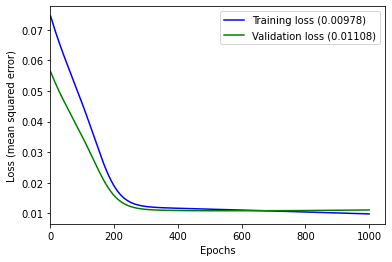

In [ ]:

#-------------------Define Sequential model with 3 layers
model = tf.keras.Sequential()
model.add(layers.Dense(8, activation="relu", input_shape=(8,)))
model.add(layers.Dense(38))
model.summary()

# Compile model
learning_rate=0.5
# model= tf.keras.Model(inputs=[inputs], outputs=[outputs])
opt = tf.keras.optimizers.Adadelta(learning_rate=learning_rate)
model.compile(optimizer=opt,
              loss='mean_squared_error',
              metrics=['mse', 'mae'])

BATCH_SIZE = 200
EPOCHS = 1000

# Train model
results = model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split = 0.2,
          verbose=1,
          validation_data=(X_test, y_test))
          
score = model.evaluate(X_test, y_test, verbose=0)
print('Test mean_squared_error:', score[0])
print('Test mae:', score[2])

#-------------save the model and results
model.save(path+'GA_ANN')# 
#----------------------------------------- plotting the accuracy history
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.xlim(xmin=0)
    # plt.ylim(ymin=0.065, ymax=0.1)
    # plt.title('Loss-n={}, batch={}, lr={}'.format(X_train.shape, batch_size, learning_rate))
    plt.xlabel('Epochs')
    plt.ylabel('Loss (mean squared error)')
    plt.legend()
   
#import above function and pass the parameter used while training    
plot_history(results)    
# plt.savefig('Final_Performance_n2100', dpi = 300)
# plt.savefig('n={}'.format(X_train.shape))

with open(path+'trainHistoryDict', 'wb') as file_pi:
        pickle.dump(results.history, file_pi)
